# Are Those Transactions Fraud?
## Submit Binary-target 'isFraud'

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

## Datasets

In [2]:
train_identity = pd.read_csv('../../ieee-fraud-detection/train_identity.csv')
train_transaction = pd.read_csv('../../ieee-fraud-detection/train_transaction.csv')
test_transaction=pd.read_csv('../../ieee-fraud-detection/test_transaction.csv')
test_identity=pd.read_csv('../../ieee-fraud-detection/test_identity.csv')
sample_submission=pd.read_csv('../../ieee-fraud-detection/sample_submission.csv')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

train_df = train_transaction.merge(train_identity, how="left", on="TransactionID")
test_df = test_transaction.merge(test_identity, how="left", on="TransactionID")

In [65]:
train_df.head(20)

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.500,W,13926,NaN,150.0,discover,142.0,credit,315.0,87.0,19.0,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,13.0,13.0,NaN,NaN,NaN,0.0,T,T,T,M2,F,T,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,117.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,117.0,0.0,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.000,W,2755,404.0,150.0,mastercard,102.0,

In [6]:
test_df.head(50)

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,id-01,id-02,id-03,id-04,id-05,id-06,id-07,id-08,id-09,id-10,id-11,id-12,id-13,id-14,id-15,id-16,id-17,id-18,id-19,id-20,id-21,id-22,id-23,id-24,id-25,id-26,id-27,id-28,id-29,id-30,id-31,id-32,id-33,id-34,id-35,id-36,id-37,id-38,DeviceType,DeviceInfo
0,3663549,18403224,31.950,W,10409,111.0,150.0,visa,226.0,debit,170.0,87.0,1.0,NaN,gmail.com,NaN,6.0,6.0,0.0,0.0,3.0,4.0,0.0,0.0,6.0,0.0,5.0,1.0,115.0,6.0,419.0,419.0,27.0,398.0,27.0,NaN,NaN,NaN,NaN,418.0,203.0,NaN,NaN,NaN,409.0,T,T,F,NaN,NaN,F,T,T,T,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000000,47.950001,0.000000,0.000000,47.950001,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,47.950001,0.000000,0.000000,47.950001,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1

## 컬럼 살펴보기

In [7]:
# train_transaction

# 1. TransactionID : 거래번호(?)

# 2. isFraud : 0은 정상거래, 1은 사기거래

# 3. TransactionDT : 지정된 참조 날짜 시간(실제 타임스탬프가 아님), s단위

# 4. TransactionAMT : 거래대금(단위 : 달러)

# 5. ProductCD : 제품코드(서비스도 있음)

# 6. card1 ~ card6 : 카드 유형, 카드 범주, 발급 은행, 국가 등과 같은 결제 정보

# 7. addr1 : 구매자를 위한 주소, 청구 영역

# 8. addr2 : 구매자를 위한 주소, 청구 국가

# 9. dist1 : 청구 주소, 우편 주소, 우편 번호, ip주소, 전화 지역 등 사이의 거리

# 10. P_emaildomain : 구매자 이메일 도메인

# 11. R_emaildomain : 수신자 이메일 도메인, 특정 트랜잭션에는 수신자가 필요하지 않으므로 null값

# 12. C1 ~ C14 : 결제 카드와 연결된 정보, 기기, ipaddr, billingaddr 등이 있음, 또한 구매자와 수령자 모두를 위한 것으로 그 수가 두배

# 13. D1 ~ D15 : 이전 거래 사이의 일 등 시간 델타(정확히 어떤 시간인지 알 수 없음)

# 14. M1 ~ M9 : 카드의 이름과 주소 등 일치여부(T/F), (M4는 무엇인지 모르겠음)

# 15. V1 ~ V339 : 순위, 계수 및 기타 엔티티 관계를 포함한 Vseta의 다양한 기능이 수치화 됨, 일부값이 우연히 바이너리 된다면 시도해 볼 만한 가치가 있을 것



# train_identity

# 16. id-01 ~ id-38 : 이 표의 변수는 ID 정보 - 트랜잭션과 관련된 네트워크 연결 정보(IP, ISP, 프록시 등) 및 디지털 서명(UA/브라우저/OS/버전 등), Vesta의 사기 방지 시스템과 디지털 보안 파트너가 수집함, 보안상 자세히 알려줄 수 없지만, 이러한 기능의 기본적인 의미를 파악하여 수치, 범주로 언급함으로써 부적절하게 처리하지 않길 바람

# 17. DeviceType : 데스크롭, 모바일과 같은 장치 타입

# 18. DeviceInfo : 장치 정보

# EDA

In [5]:
def check_df(dataframe, head=5):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### NA #####################")
    print(dataframe.isnull().sum())
    print("##################### unique #####################")
    print(dataframe.nunique())

In [6]:
check_df(train_df)

##################### Shape #####################
(590540, 434)
##################### Types #####################
TransactionID       int64
isFraud             int64
TransactionDT       int64
TransactionAmt    float64
ProductCD          object
card1               int64
card2             float64
card3             float64
card4              object
card5             float64
card6              object
addr1             float64
addr2             float64
dist1             float64
dist2             float64
P_emaildomain      object
R_emaildomain      object
C1                float64
C2                float64
C3                float64
C4                float64
C5                float64
C6                float64
C7                float64
C8                float64
C9                float64
C10               float64
C11               float64
C12               float64
C13               float64
C14               float64
D1                float64
D2                float64
D3                float64
D4

TransactionID          0
isFraud                0
TransactionDT          0
TransactionAmt         0
ProductCD              0
card1                  0
card2               8933
card3               1565
card4               1577
card5               4259
card6               1571
addr1              65706
addr2              65706
dist1             352271
dist2             552913
P_emaildomain      94456
R_emaildomain     453249
C1                     0
C2                     0
C3                     0
C4                     0
C5                     0
C6                     0
C7                     0
C8                     0
C9                     0
C10                    0
C11                    0
C12                    0
C13                    0
C14                    0
D1                  1269
D2                280797
D3                262878
D4                168922
D5                309841
D6                517353
D7                551623
D8                515614
D9                515614


TransactionID     590540
isFraud                2
TransactionDT     573349
TransactionAmt     20902
ProductCD              5
card1              13553
card2                500
card3                114
card4                  4
card5                119
card6                  4
addr1                332
addr2                 74
dist1               2651
dist2               1751
P_emaildomain         59
R_emaildomain         60
C1                  1657
C2                  1216
C3                    27
C4                  1260
C5                   319
C6                  1328
C7                  1103
C8                  1253
C9                   205
C10                 1231
C11                 1476
C12                 1199
C13                 1597
C14                 1108
D1                   641
D2                   641
D3                   649
D4                   808
D5                   688
D6                   829
D7                   597
D8                 12353
D9                    24


In [10]:
check_df(test_df)

##################### Shape #####################
(506691, 433)
##################### Types #####################
TransactionID       int64
TransactionDT       int64
TransactionAmt    float64
ProductCD          object
card1               int64
card2             float64
card3             float64
card4              object
card5             float64
card6              object
addr1             float64
addr2             float64
dist1             float64
dist2             float64
P_emaildomain      object
R_emaildomain      object
C1                float64
C2                float64
C3                float64
C4                float64
C5                float64
C6                float64
C7                float64
C8                float64
C9                float64
C10               float64
C11               float64
C12               float64
C13               float64
C14               float64
D1                float64
D2                float64
D3                float64
D4                float64
D5

TransactionID          0
TransactionDT          0
TransactionAmt         0
ProductCD              0
card1                  0
card2               8654
card3               3002
card4               3086
card5               4547
card6               3007
addr1              65609
addr2              65609
dist1             291217
dist2             470255
P_emaildomain      69192
R_emaildomain     370821
C1                     3
C2                     3
C3                     3
C4                     3
C5                     3
C6                     3
C7                     3
C8                     3
C9                     3
C10                    3
C11                    3
C12                    3
C13                 4748
C14                    3
D1                  6031
D2                234769
D3                203142
D4                 76851
D5                224375
D6                381908
D7                446558
D8                432353
D9                432353
D10                12545


In [11]:
cat_cols = ["ProductCD", "card1", "card2", "card3", "card4", "card5", "card6", "addr1", "addr2", "P_emaildomain", 
            "R_emaildomain", "M1", "M2", "M3", "M4", "M5", "M6", "M7", "M8", "M9", "DeviceType", "DeviceInfo", 
            "id_12", "id_13", "id_14", "id_15", "id_16", "id_17", "id_18", "id_19", "id_20", "id_21", "id_22", 
            "id_23", "id_24", "id_25", "id_26", "id_27", "id_28", "id_29", "id_30", "id_31", "id_32", "id_33", 
            "id_34", "id_35", "id_36", "id_37", "id_38"]

In [12]:
# 범주형이 아니면서 TransactionID, isFraud 컬럼에 포함되지 않는 컬럼들을 numerical 컬럼으로
num_cols = [col for col in train_df.columns if col not in cat_cols and col not in ["TransactionID", "isFraud"]]

In [13]:
# 범주형 변수에 포함된 클래스의 백분율

def cat_summary(dataframe, col_name):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("\n")

In [14]:
for col in cat_cols:
    cat_summary(train_df, col)

   ProductCD      Ratio
W     439670  74.452196
C      68519  11.602770
R      37699   6.383818
H      33024   5.592170
S      11628   1.969045


       card1     Ratio
7919   14932  2.528533
9500   14162  2.398144
15885  10361  1.754496
17188  10344  1.751617
15066   7945  1.345379
12695   7091  1.200765
12544   6773  1.146916
6019    6771  1.146578
2803    6141  1.039896
7585    5334  0.903241
10616   5172  0.875809
12839   5129  0.868527
3154    4614  0.781319
2616    4410  0.746774
18132   4209  0.712737
9633    4158  0.704101
15497   3977  0.673451
16132   3929  0.665323
2884    3873  0.655840
16075   3748  0.634673
11207   3693  0.625360
10112   3560  0.602838
7508    3490  0.590985
10057   3166  0.536119
12501   3152  0.533749
7826    3006  0.509026
16659   2988  0.505978
12577   2891  0.489552
5812    2818  0.477190
7664    2792  0.472788
7861    2774  0.469740
6530    2714  0.459579
4461    2686  0.454838
8320    2632  0.445694
5033    2604  0.440952
7207    2578  0.436550
150

                   card4      Ratio
visa              384767  65.155112
mastercard        189217  32.041352
american express    8328   1.410235
discover            6651   1.126257


        card5      Ratio
226.0  296546  50.216073
224.0   81513  13.803129
166.0   57140   9.675890
102.0   29105   4.928540
117.0   25941   4.392759
138.0   19737   3.342195
195.0   16945   2.869408
137.0   11720   1.984624
126.0   10298   1.743828
219.0    9924   1.680496
202.0    7103   1.202797
162.0    4524   0.766079
229.0    2048   0.346801
197.0    1551   0.262641
150.0    1338   0.226572
100.0     978   0.165611
223.0     936   0.158499
118.0     752   0.127341
190.0     744   0.125986
146.0     671   0.113625
198.0     670   0.113455
236.0     647   0.109561
185.0     474   0.080266
203.0     428   0.072476
147.0     417   0.070613
141.0     341   0.057744
129.0     325   0.055034
142.0     277   0.046906
194.0     259   0.043858
183.0     258   0.043689
228.0     248   0.041995
119.0     219   0.

       M2      Ratio
T  285468  48.340163
F   33972   5.752701


       M3      Ratio
T  251731  42.627256
F   67709  11.465608


        M4      Ratio
M0  196405  33.258543
M2   59865  10.137332
M1   52826   8.945372


       M5      Ratio
F  132491  22.435567
T  107567  18.215024


       M6      Ratio
F  227856  38.584347
T  193324  32.736817


       M7      Ratio
F  211374  35.793342
T   32901   5.571341


       M8      Ratio
F  155251  26.289667
T   89037  15.077217


       M9      Ratio
T  205656  34.825075
F   38632   6.541809


         DeviceType      Ratio
desktop       85165  14.421546
mobile        55645   9.422732


                                             DeviceInfo     Ratio
Windows                                           47722  8.081078
iOS Device                                        19782  3.349815
MacOS                                             12573  2.129068
Trident/7.0                                        7440  1.259864
rv:11.0                       

           id_12      Ratio
NotFound  123025  20.832628
Found      21208   3.591289


      id_13     Ratio
52.0  58099  9.838284
49.0  26365  4.464558
64.0  14429  2.443357
33.0  10048  1.701494
27.0   3666  0.620788
20.0   2878  0.487351
14.0   2499  0.423172
63.0   1468  0.248586
19.0   1147  0.194229
25.0   1066  0.180513
43.0    842  0.142581
62.0    813  0.137671
18.0    688  0.116504
41.0    654  0.110746
55.0    523  0.088563
11.0    373  0.063163
15.0    372  0.062993
24.0    318  0.053849
35.0    317  0.053680
51.0    196  0.033190
61.0    108  0.018288
44.0     85  0.014394
54.0     67  0.011346
28.0     59  0.009991
39.0     34  0.005757
31.0     29  0.004911
45.0     26  0.004403
38.0     22  0.003725
13.0     21  0.003556
58.0     17  0.002879
36.0     15  0.002540
48.0     10  0.001693
32.0     10  0.001693
56.0      9  0.001524
30.0      7  0.001185
22.0      5  0.000847
53.0      4  0.000677
17.0      3  0.000508
57.0      3  0.000508
21.0      3  0.000508
46.0      3 

   id_35      Ratio
T  77814  13.176753
F  63171  10.697159


    id_36      Ratio
F  134066  22.702272
T    6919   1.171640


    id_37      Ratio
T  110452  18.703559
F   30533   5.170353


   id_38      Ratio
F  73922  12.517696
T  67063  11.356216




In [15]:
def num_summary(dataframe, numerical_col):
    print(dataframe[numerical_col].describe())

    print("\n")

In [16]:
for col in num_cols:
    num_summary(train_df, col)

count    5.905400e+05
mean     7.372311e+06
std      4.617224e+06
min      8.640000e+04
25%      3.027058e+06
50%      7.306528e+06
75%      1.124662e+07
max      1.581113e+07
Name: TransactionDT, dtype: float64


count    590540.000000
mean        135.027176
std         239.162522
min           0.251000
25%          43.321000
50%          68.769000
75%         125.000000
max       31937.391000
Name: TransactionAmt, dtype: float64


count    238269.000000
mean        118.502180
std         371.872026
min           0.000000
25%           3.000000
50%           8.000000
75%          24.000000
max       10286.000000
Name: dist1, dtype: float64


count    37627.000000
mean       231.855423
std        529.053494
min          0.000000
25%          7.000000
50%         37.000000
75%        206.000000
max      11623.000000
Name: dist2, dtype: float64


count    590540.000000
mean         14.092458
std         133.569018
min           0.000000
25%           1.000000
50%           1.000000
75%  

count    311253.000000
mean          1.027704
std           0.186069
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           8.000000
Name: V8, dtype: float64


count    311253.000000
mean          1.041529
std           0.226339
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           8.000000
Name: V9, dtype: float64


count    311253.000000
mean          0.463915
std           0.521522
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           4.000000
Name: V10, dtype: float64


count    311253.000000
mean          0.478987
std           0.552431
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           5.000000
Name: V11, dtype: float64


count    514467.000000
mean          0.559711
std           0.510533
min           0.000000
25%           0.000000
50%           1.000000
75%           1.

count    421571.000000
mean          0.170579
std           0.403899
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           6.000000
Name: V51, dtype: float64


count    421571.000000
mean          0.182695
std           0.439002
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          12.000000
Name: V52, dtype: float64


count    513444.000000
mean          0.577586
std           0.511571
min           0.000000
25%           0.000000
50%           1.000000
75%           1.000000
max           5.000000
Name: V53, dtype: float64


count    513444.000000
mean          0.619982
std           0.534635
min           0.000000
25%           0.000000
50%           1.000000
75%           1.000000
max           6.000000
Name: V54, dtype: float64


count    513444.000000
mean          1.067670
std           0.391364
min           0.000000
25%           1.000000
50%           1.000000
75%           

count    501376.000000
mean          0.154812
std           0.402314
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           7.000000
Name: V93, dtype: float64


count    501376.000000
mean          0.137007
std           0.343878
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           2.000000
Name: V94, dtype: float64


count    590226.000000
mean          1.038019
std          21.034304
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         880.000000
Name: V95, dtype: float64


count    590226.00000
mean          3.00519
std          40.23949
min           0.00000
25%           0.00000
50%           0.00000
75%           1.00000
max        1410.00000
Name: V96, dtype: float64


count    590226.000000
mean          1.718933
std          27.700449
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000

count    590226.000000
mean         17.250132
std         293.847563
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max       90750.000000
Name: V135, dtype: float64


count    590226.000000
mean         38.821196
std         451.808411
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max       90750.000000
Name: V136, dtype: float64


count    590226.000000
mean         26.365090
std         348.332714
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max       90750.000000
Name: V137, dtype: float64


count    81945.000000
mean         0.036439
std          0.428490
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         22.000000
Name: V138, dtype: float64


count    81945.000000
mean         1.073915
std          1.333924
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
ma

count    139631.000000
mean          3.529245
std          41.310622
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         861.000000
Name: V177, dtype: float64


count    139631.000000
mean          6.649283
std          69.447364
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max        1235.000000
Name: V178, dtype: float64


count    139631.000000
mean          4.869012
std          50.489426
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         920.000000
Name: V179, dtype: float64


count    139819.000000
mean          0.924123
std           6.112630
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          83.000000
Name: V180, dtype: float64


count    139631.000000
mean          0.253332
std           1.248974
min           0.000000
25%           0.000000
50%           0.000000
75%       

count    130430.000000
mean          1.054619
std           9.547354
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         303.000000
Name: V217, dtype: float64


count    130430.000000
mean          1.725784
std          13.919876
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max         400.000000
Name: V218, dtype: float64


count    130430.000000
mean          1.367132
std          12.044032
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max         378.000000
Name: V219, dtype: float64


count    141416.000000
mean          0.169472
std           1.002463
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          25.000000
Name: V220, dtype: float64


count    141416.000000
mean          1.274912
std           2.728792
min           0.000000
25%           1.000000
50%           1.000000
75%       

count    130430.000000
mean          1.107161
std           1.323230
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          49.000000
Name: V261, dtype: float64


count    130430.000000
mean          1.013279
std           0.625455
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          20.000000
Name: V262, dtype: float64


count    130430.000000
mean        117.390676
std        1294.851543
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      153600.000000
Name: V263, dtype: float64


count    130430.000000
mean        201.657617
std        2284.827492
min           0.000000
25%           0.000000
50%           0.000000
75%          33.593498
max      153600.000000
Name: V264, dtype: float64


count    130430.000000
mean        153.520534
std        1605.512276
min           0.000000
25%           0.000000
50%           0.000000
75%       

count    589271.000000
mean          0.045507
std           0.289573
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          11.000000
Name: V300, dtype: float64


count    589271.000000
mean          0.052002
std           0.318310
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          13.000000
Name: V301, dtype: float64


count    590528.000000
mean          0.251761
std           0.481889
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          16.000000
Name: V302, dtype: float64


count    590528.000000
mean          0.283140
std           0.623608
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          20.000000
Name: V303, dtype: float64


count    590528.000000
mean          0.264208
std           0.528238
min           0.000000
25%           0.000000
50%           0.000000
75%       

count    136865.000000
mean         -6.698710
std          16.491104
min        -100.000000
25%          -6.000000
50%           0.000000
75%           0.000000
max           0.000000
Name: id_06, dtype: float64


count    5155.000000
mean       13.285354
std        11.384207
min       -46.000000
25%         5.000000
50%        14.000000
75%        22.000000
max        61.000000
Name: id_07, dtype: float64


count    5155.000000
mean      -38.600388
std        26.084899
min      -100.000000
25%       -48.000000
50%       -34.000000
75%       -23.000000
max         0.000000
Name: id_08, dtype: float64


count    74926.000000
mean         0.091023
std          0.983842
min        -36.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         25.000000
Name: id_09, dtype: float64


count    74926.000000
mean        -0.301124
std          2.789446
min       -100.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          0.000000
Name: id

In [17]:
for col in num_cols: 
    print(f"{col}: {len(train_df[col].value_counts())}")

TransactionDT: 573349
TransactionAmt: 20902
dist1: 2651
dist2: 1751
C1: 1657
C2: 1216
C3: 27
C4: 1260
C5: 319
C6: 1328
C7: 1103
C8: 1253
C9: 205
C10: 1231
C11: 1476
C12: 1199
C13: 1597
C14: 1108
D1: 641
D2: 641
D3: 649
D4: 808
D5: 688
D6: 829
D7: 597
D8: 12353
D9: 24
D10: 818
D11: 676
D12: 635
D13: 577
D14: 802
D15: 859
V1: 2
V2: 9
V3: 10
V4: 7
V5: 7
V6: 10
V7: 10
V8: 9
V9: 9
V10: 5
V11: 6
V12: 4
V13: 7
V14: 2
V15: 8
V16: 15
V17: 16
V18: 16
V19: 8
V20: 15
V21: 6
V22: 9
V23: 14
V24: 14
V25: 7
V26: 13
V27: 4
V28: 4
V29: 6
V30: 8
V31: 8
V32: 15
V33: 7
V34: 13
V35: 4
V36: 6
V37: 55
V38: 55
V39: 16
V40: 18
V41: 2
V42: 9
V43: 9
V44: 49
V45: 49
V46: 7
V47: 9
V48: 6
V49: 6
V50: 6
V51: 7
V52: 9
V53: 6
V54: 7
V55: 18
V56: 52
V57: 7
V58: 11
V59: 17
V60: 17
V61: 7
V62: 11
V63: 8
V64: 8
V65: 2
V66: 8
V67: 9
V68: 3
V69: 6
V70: 7
V71: 7
V72: 11
V73: 8
V74: 9
V75: 5
V76: 7
V77: 31
V78: 32
V79: 8
V80: 20
V81: 20
V82: 8
V83: 8
V84: 8
V85: 8
V86: 31
V87: 31
V88: 2
V89: 3
V90: 6
V91: 7
V92: 8
V93: 8
V94: 

In [18]:
for col in cat_cols: 
    print(f"{col}: {len(train_df[col].value_counts())}")

ProductCD: 5
card1: 13553
card2: 500
card3: 114
card4: 4
card5: 119
card6: 4
addr1: 332
addr2: 74
P_emaildomain: 59
R_emaildomain: 60
M1: 2
M2: 2
M3: 2
M4: 3
M5: 2
M6: 2
M7: 2
M8: 2
M9: 2
DeviceType: 2
DeviceInfo: 1786
id_12: 2
id_13: 54
id_14: 25
id_15: 3
id_16: 2
id_17: 104
id_18: 18
id_19: 522
id_20: 394
id_21: 490
id_22: 25
id_23: 3
id_24: 12
id_25: 341
id_26: 95
id_27: 2
id_28: 2
id_29: 2
id_30: 75
id_31: 130
id_32: 4
id_33: 260
id_34: 4
id_35: 2
id_36: 2
id_37: 2
id_38: 2


In [19]:
# target valus에 따른 카테고리 컬럼 타겟 평균 (1에 가까울수록 사기)
def target_summary_with_cat(dataframe, target, categorical_col):
    print(pd.DataFrame({"TARGET_MEAN": dataframe.groupby(categorical_col)[target].mean().sort_values(ascending=False)}), 
          end="\n\n")
    print("\n")

In [20]:
for col in cat_cols:
    target_summary_with_cat(train_df,"isFraud",col)

           TARGET_MEAN
ProductCD             
C             0.116873
S             0.058996
H             0.047662
R             0.037826
W             0.020399



       TARGET_MEAN
card1             
10320     1.000000
14671     1.000000
8185      1.000000
11292     1.000000
15042     1.000000
11228     1.000000
4895      1.000000
15053     1.000000
4817      1.000000
4788      1.000000
4774      1.000000
15192     1.000000
1266      1.000000
4688      1.000000
15253     1.000000
7098      1.000000
2401      1.000000
17220     1.000000
9174      1.000000
13084     1.000000
11403     1.000000
11436     1.000000
5255      1.000000
14770     1.000000
9040      1.000000
5178      1.000000
13146     1.000000
9051      1.000000
13103     1.000000
2293      1.000000
5176      1.000000
7781      1.000000
5093      1.000000
13128     1.000000
9115      1.000000
9344      1.000000
11158     1.000000
15380     1.000000
9568      1.000000
12246     1.000000
15602     1.000000
15607     1.000000


                  TARGET_MEAN
card4                        
discover             0.077282
visa                 0.034756
mastercard           0.034331
american express     0.028698



       TARGET_MEAN
card5             
167.0     1.000000
191.0     0.500000
107.0     0.333333
139.0     0.230769
137.0     0.147184
212.0     0.119048
147.0     0.112710
141.0     0.093842
143.0     0.093023
223.0     0.088675
138.0     0.085221
144.0     0.073059
162.0     0.066534
203.0     0.065421
149.0     0.064935
102.0     0.062945
232.0     0.057971
219.0     0.057537
159.0     0.055556
197.0     0.055448
133.0     0.055172
228.0     0.052419
198.0     0.050746
194.0     0.050193
142.0     0.043321
135.0     0.040816
237.0     0.040816
195.0     0.040189
185.0     0.040084
224.0     0.038669
199.0     0.035714
132.0     0.034483
146.0     0.034277
236.0     0.030912
226.0     0.029516
129.0     0.027692
119.0     0.027397
190.0     0.026882
118.0     0.019947
100.0     0.018405
150.0     0.017190


       TARGET_MEAN
addr2             
10.0      1.000000
82.0      1.000000
51.0      1.000000
46.0      1.000000
92.0      1.000000
75.0      1.000000
38.0      0.666667
65.0      0.536585
36.0      0.500000
54.0      0.333333
73.0      0.200000
96.0      0.139498
68.0      0.100000
29.0      0.090909
60.0      0.090467
32.0      0.065934
87.0      0.023972
94.0      0.000000
62.0      0.000000
63.0      0.000000
101.0     0.000000
100.0     0.000000
66.0      0.000000
98.0      0.000000
97.0      0.000000
69.0      0.000000
70.0      0.000000
71.0      0.000000
83.0      0.000000
84.0      0.000000
93.0      0.000000
74.0      0.000000
89.0      0.000000
88.0      0.000000
76.0      0.000000
77.0      0.000000
61.0      0.000000
78.0      0.000000
79.0      0.000000
86.0      0.000000
72.0      0.000000
55.0      0.000000
59.0      0.000000
57.0      0.000000
14.0      0.000000
15.0      0.000000
16.0      0.000000
17.0      0.000000
18.0      0.000000
19.0      0.000000
20.0      0.

         TARGET_MEAN
id_15               
Found       0.105097
Unknown     0.091885
New         0.049244



          TARGET_MEAN
id_16                
Found        0.107231
NotFound     0.048242



       TARGET_MEAN
id_17             
110.0     1.000000
173.0     1.000000
120.0     1.000000
211.0     1.000000
197.0     0.800000
214.0     0.777778
114.0     0.750000
204.0     0.666667
202.0     0.571429
163.0     0.500000
136.0     0.500000
194.0     0.454545
190.0     0.428571
199.0     0.333333
111.0     0.307692
147.0     0.208333
198.0     0.200000
226.0     0.166667
106.0     0.156250
225.0     0.130810
171.0     0.120000
168.0     0.111111
102.0     0.110305
100.0     0.098214
212.0     0.086957
162.0     0.066667
148.0     0.043668
166.0     0.042604
142.0     0.040984
195.0     0.040816
205.0     0.035714
119.0     0.029412
133.0     0.020408
191.0     0.016260
121.0     0.014337
159.0     0.011364
177.0     0.000000
186.0     0.000000
175.0     0.000000
228.0     0.000000
178

                      TARGET_MEAN
id_23                            
IP_PROXY:ANONYMOUS       0.137255
IP_PROXY:TRANSPARENT     0.070221
IP_PROXY:HIDDEN          0.055829



       TARGET_MEAN
id_24             
17.0      1.000000
24.0      0.500000
26.0      0.500000
19.0      0.400000
25.0      0.285714
11.0      0.094072
16.0      0.063636
15.0      0.061481
21.0      0.060606
12.0      0.000000
18.0      0.000000
23.0      0.000000



       TARGET_MEAN
id_25             
157.0     1.000000
161.0     1.000000
489.0     1.000000
349.0     1.000000
409.0     1.000000
539.0     1.000000
403.0     1.000000
459.0     1.000000
461.0     1.000000
311.0     1.000000
479.0     0.958333
463.0     0.777778
270.0     0.722222
232.0     0.666667
438.0     0.666667
216.0     0.636364
512.0     0.600000
193.0     0.600000
422.0     0.583333
158.0     0.466667
122.0     0.400000
259.0     0.333333
449.0     0.333333
486.0     0.333333
385.0     0.285714
194.0     0.266667
430.0     0.250000
332.0  

       TARGET_MEAN
id_32             
0.0       0.500000
16.0      0.222222
32.0      0.066727
24.0      0.033917



           TARGET_MEAN
id_33                 
1440x759      1.000000
640x360       1.000000
1916x901      1.000000
1024x552      1.000000
2076x1080     1.000000
1920x975      1.000000
1364x768      0.842105
4500x3000     0.666667
1024x600      0.647727
1768x992      0.600000
0x0           0.500000
3201x1800     0.400000
801x480       0.390625
855x480       0.380000
1365x767      0.333333
1365x768      0.307692
1184x720      0.200000
800x600       0.200000
2960x1440     0.148936
1600x1200     0.144330
1280x720      0.137329
1440x810      0.125000
1536x864      0.119048
2436x1125     0.113208
2112x1188     0.111111
2208x1242     0.098367
2220x1081     0.079545
960x540       0.068966
2001x1125     0.059804
1334x750      0.059097
1366x768      0.057292
2220x1080     0.053309
1360x768      0.049107
1280x800      0.047929
1920x1281     0.047619
3360x2100     0.042105
1502x844 

In [21]:
# target valus에 따른 뉴메릭 컬럼 타겟 평균 (1에 가까울수록 사기)

In [22]:
def target_summary_with_num(dataframe, target, numerical_col):
    print(dataframe.groupby(target).agg({numerical_col: "mean"}), end="\n\n")
    print(end="\n\n")

In [23]:
for col in num_cols:
    target_summary_with_num(train_df, "isFraud", col)

         TransactionDT
isFraud               
0         7.360791e+06
1         7.690033e+06



         TransactionAmt
isFraud                
0            134.511665
1            149.244779



              dist1
isFraud            
0        117.360098
1        174.588854



              dist2
isFraud            
0        235.199758
1        201.472259



                C1
isFraud           
0        13.314952
1        35.535740



                C2
isFraud           
0        14.173283
1        45.509413



               C3
isFraud          
0        0.005840
1        0.000242



                C4
isFraud           
0         3.693878
1        15.077336



               C5
isFraud          
0        5.722537
1        1.406717



                C6
isFraud           
0         8.786377
1        16.923148



                C7
isFraud           
0         2.517484
1        11.977157



                C8
isFraud           
0         4.560881
1        21.242608



               C

              V78
isFraud          
0        1.122854
1        1.783975



              V79
isFraud          
0        0.123310
1        0.538109



              V80
isFraud          
0        0.130368
1        0.546043



              V81
isFraud          
0        0.137533
1        0.601452



              V82
isFraud          
0        0.840640
1        0.962104



              V83
isFraud          
0        0.875981
1        1.059071



              V84
isFraud          
0        0.125896
1        0.470068



              V85
isFraud          
0        0.136770
1        0.535058



              V86
isFraud          
0        1.045453
1        1.640020



              V87
isFraud          
0        1.075798
1        1.799658



              V88
isFraud          
0        0.999243
1        0.999329



              V89
isFraud          
0        0.000932
1        0.000000



              V90
isFraud          
0        0.412315
1        0.092512



              V91
isFraud

             V186
isFraud          
0        1.095418
1        1.770631



             V187
isFraud          
0        1.773586
1        2.661111



             V188
isFraud          
0        0.955005
1        1.709666



             V189
isFraud          
0        0.966687
1        1.871364



             V190
isFraud          
0        1.124106
1        2.249570



             V191
isFraud          
0        1.048028
1        1.186611



             V192
isFraud          
0        1.223194
1        1.402392



             V193
isFraud          
0        1.138757
1        1.279011



             V194
isFraud          
0        0.932644
1        1.098464



             V195
isFraud          
0        0.937996
1        1.142999



             V196
isFraud          
0        1.072182
1        1.229006



             V197
isFraud          
0        0.934174
1        1.126287



             V198
isFraud          
0        0.941724
1        1.197200



             V199
isFraud

             V303
isFraud          
0        0.268382
1        0.690189



             V304
isFraud          
0        0.250981
1        0.629011



             V305
isFraud          
0        1.000007
1        1.000000



               V306
isFraud            
0        140.581994
1        116.765349



               V307
isFraud            
0        403.708103
1        545.881593



               V308
isFraud            
0        228.541233
1        282.044788



              V309
isFraud           
0        10.547606
1        23.363125



               V310
isFraud            
0        117.451559
1        138.719226



             V311
isFraud          
0        4.176831
1        4.901211



              V312
isFraud           
0        37.942292
1        73.144119



              V313
isFraud           
0        20.593754
1        42.250735



              V314
isFraud           
0        42.045247
1        78.456388



              V315
isFraud           
0        25.73

In [24]:
# 결측치 개수 확인

In [25]:
def missing_values_table(dataframe, na_name=False):
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]

    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])
    print(missing_df, end="\n")
    
    if na_name:
        return na_columns, missing_df

In [26]:
na_cols,missing_df=missing_values_table(train_df, True)
missing_df.reset_index(inplace=True)

               n_miss  ratio
id_24          585793  99.20
id_25          585408  99.13
id_07          585385  99.13
id_08          585385  99.13
id_21          585381  99.13
id_26          585377  99.13
id_27          585371  99.12
id_23          585371  99.12
id_22          585371  99.12
dist2          552913  93.63
D7             551623  93.41
id_18          545427  92.36
D13            528588  89.51
D14            528353  89.47
D12            525823  89.04
id_03          524216  88.77
id_04          524216  88.77
D6             517353  87.61
id_33          517251  87.59
id_10          515614  87.31
id_09          515614  87.31
D8             515614  87.31
D9             515614  87.31
id_30          512975  86.87
id_32          512954  86.86
id_34          512735  86.82
id_14          510496  86.45
V155           508595  86.12
V138           508595  86.12
V156           508595  86.12
V157           508595  86.12
V158           508595  86.12
V154           508595  86.12
V153          

# graphs

In [27]:
# null_value

In [28]:
null_variables = train_df.isnull().sum()/len(train_df) * 100
null_variables = null_variables.drop(null_variables[null_variables == 0].index).sort_values(ascending=False)[:500]
null_variables

#null 값이 너무 많은 컬럼은 제거 하는게 나을듯
#null 값이 채울만한것은 어떻게 채울 것인지 고민해보기

id_24            99.196159
id_25            99.130965
id_07            99.127070
id_08            99.127070
id_21            99.126393
id_26            99.125715
id_27            99.124699
id_23            99.124699
id_22            99.124699
dist2            93.628374
D7               93.409930
id_18            92.360721
D13              89.509263
D14              89.469469
D12              89.041047
id_03            88.768923
id_04            88.768923
D6               87.606767
id_33            87.589494
id_10            87.312290
id_09            87.312290
D8               87.312290
D9               87.312290
id_30            86.865411
id_32            86.861855
id_34            86.824771
id_14            86.445626
V155             86.123717
V138             86.123717
V156             86.123717
V157             86.123717
V158             86.123717
V154             86.123717
V153             86.123717
V161             86.123717
V162             86.123717
V139             86.123717
V

/Users/krc/miniforge3/envs/seyi/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Missing rate')

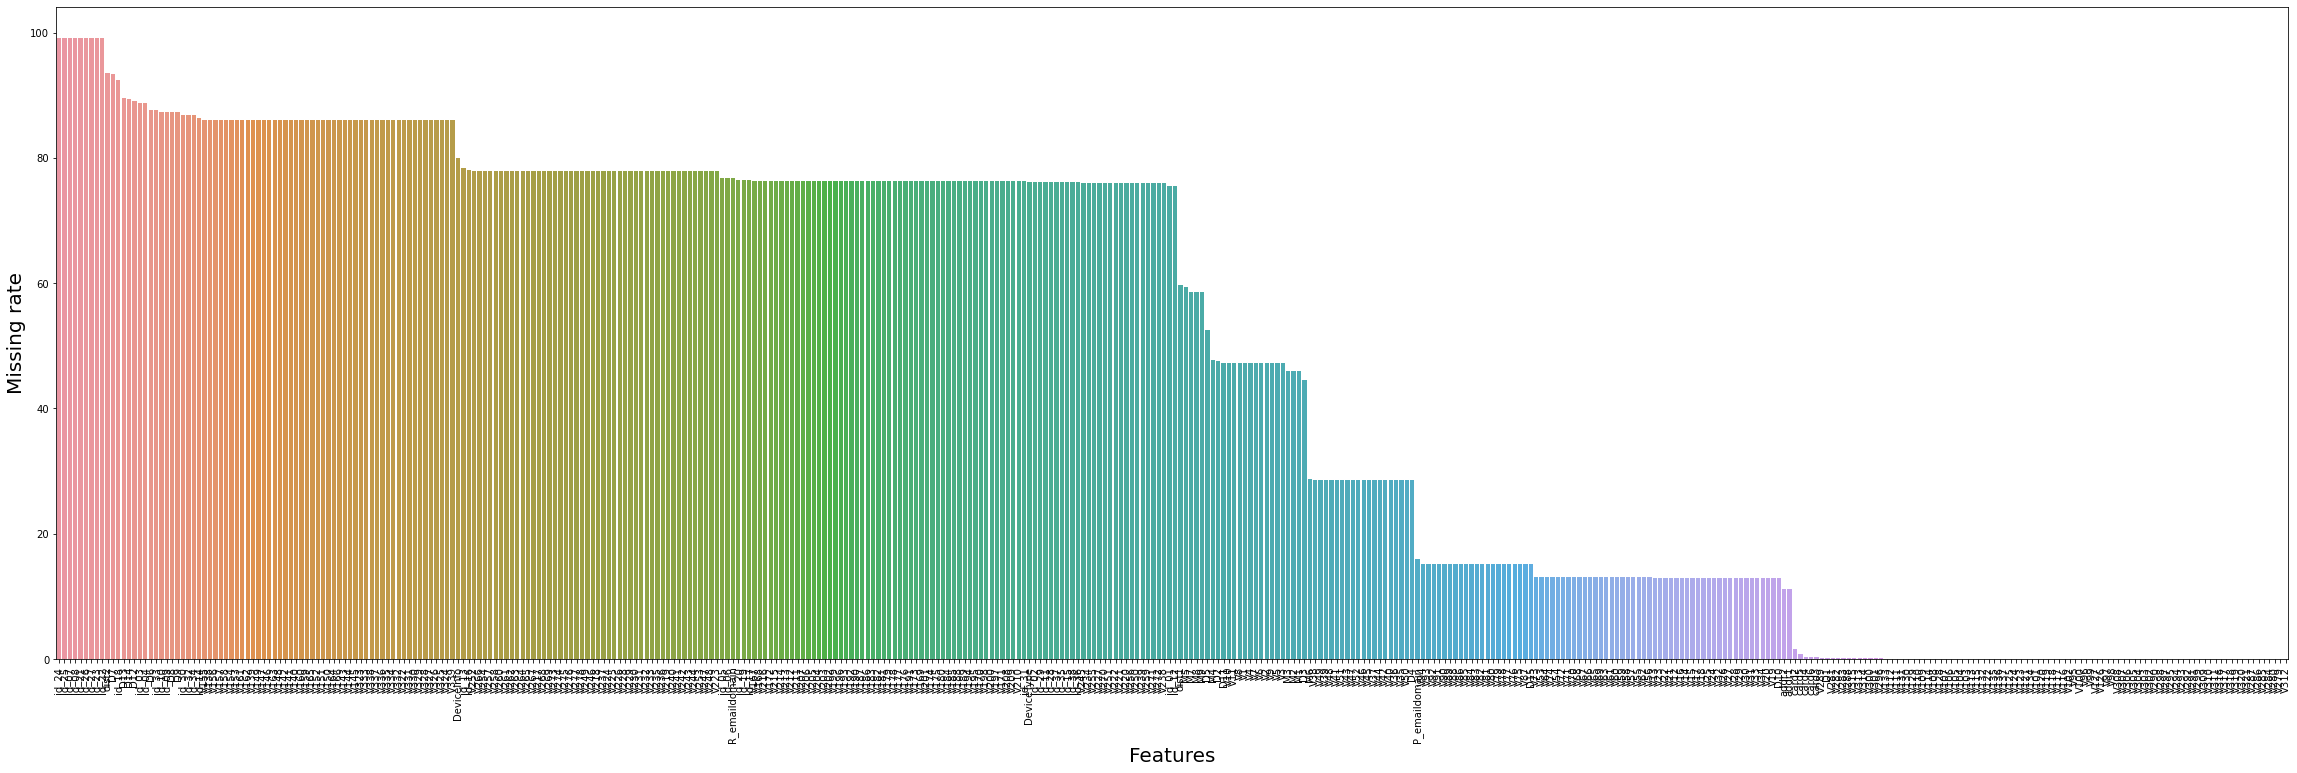

In [29]:
plt.subplots(figsize=(40,12))
plt.xticks(rotation='90')
sns.barplot(null_variables.index, null_variables)
plt.xlabel('Features', fontsize=20)
plt.ylabel('Missing rate', fontsize=20)

In [30]:
# TransactionDT

<AxesSubplot:xlabel='hour', ylabel='percentage'>

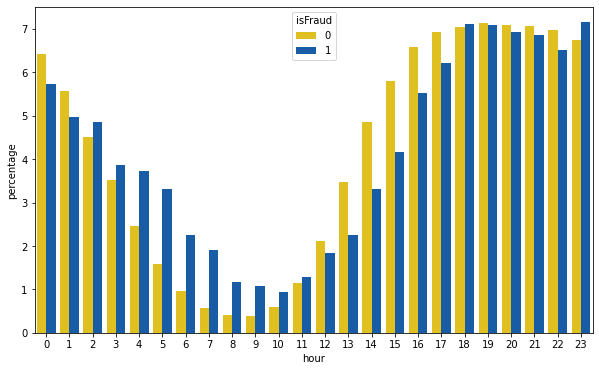

In [31]:
# 시간별
train_df['hour'] = (train_df['TransactionDT']//(3600))%24
test_df['hour'] = (test_df['TransactionDT']//(3600))%24

train_hour = (train_df.groupby(['isFraud'])['hour']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('hour'))

plt.subplots(figsize=(10,6))
sns.barplot(x="hour", y="percentage", hue="isFraud", data=train_hour, palette=["#FFD500", "#005BBB"])

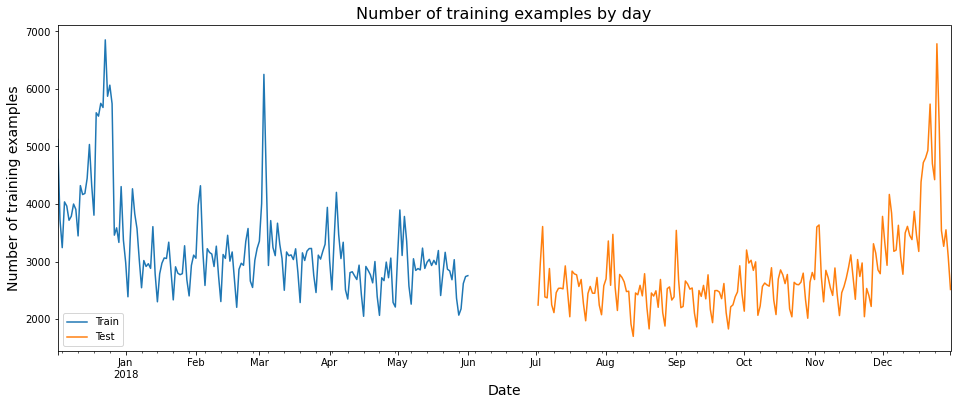

In [69]:
# 날짜별 train & test data

fig, axes = plt.subplots(1, 1, figsize=(16, 6))
train_df['TransactionDT'].dt.floor('d').value_counts().sort_index().plot(ax=axes).set_xlabel('Date', fontsize=14);
test_df['TransactionDT'].dt.floor('d').value_counts().sort_index().plot(ax=axes).set_ylabel('Number of training examples', fontsize=14);
axes.set_title('Number of training examples by day', fontsize=16);
axes.legend(['Train', 'Test']);

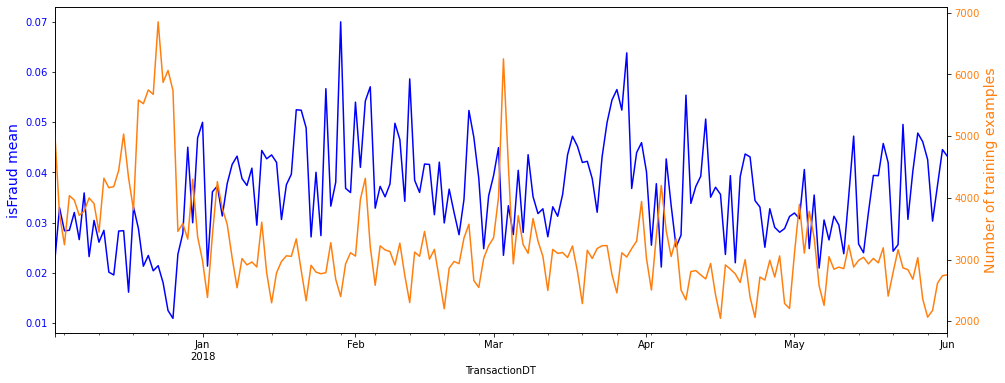

In [71]:
fig, ax1 = plt.subplots(figsize=(16, 6))
train_df.set_index('TransactionDT').resample('D').mean()['isFraud'].plot(ax=ax1, color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_ylabel('isFraud mean', color='blue', fontsize=14)
ax2 = ax1.twinx()
train_df['TransactionDT'].dt.floor('d').value_counts().sort_index().plot(ax=ax2, color='tab:orange');
ax2.tick_params(axis='y', labelcolor='tab:orange');
ax2.set_ylabel('Number of training examples', color='tab:orange', fontsize=14);
ax2.grid(False)

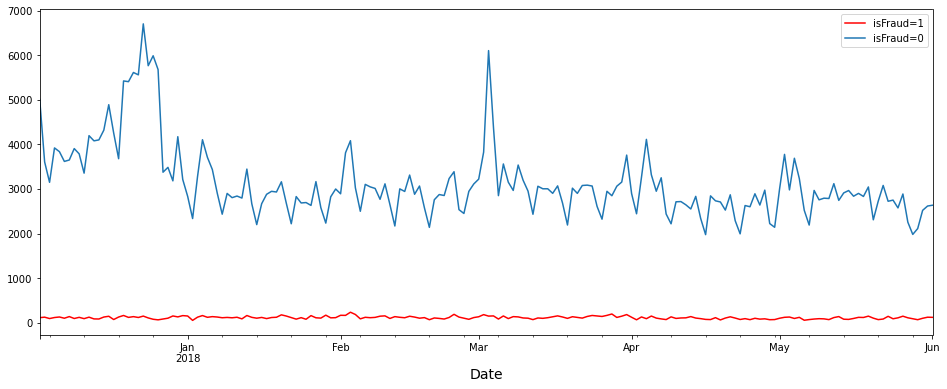

In [80]:
# 날짜별 train data isFraud

fig, axes = plt.subplots(1, 1, figsize=(16, 6))
train_df['TransactionDT'][train_df['isFraud'] == 1].dt.floor('d').value_counts().sort_index().plot(ax=axes, color="red").set_xlabel('Date', fontsize=14)
train_df['TransactionDT'][train_df['isFraud'] == 0].dt.floor('d').value_counts().sort_index().plot(ax=axes)
axes.set_title
axes.legend(['isFraud=1', 'isFraud=0']);

In [32]:
# card4 column 시각화

Text(0.5, 1.0, 'Test')

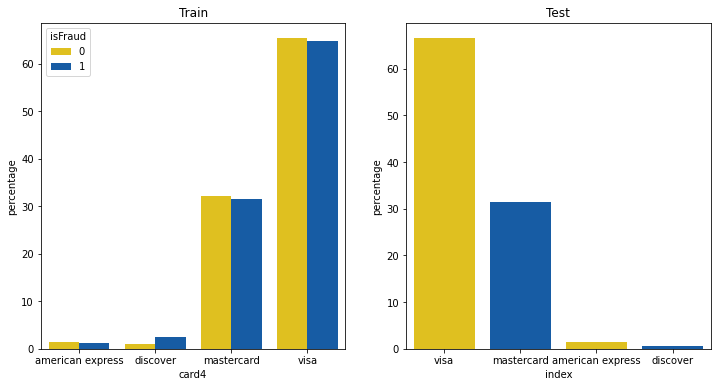

In [33]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
train_card4 = (train_df[~train_df['card4'].isnull()].groupby(['isFraud'])['card4']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('card4'))
sns.barplot(x="card4", y="percentage", hue="isFraud", data=train_card4, palette=["#FFD500", "#005BBB"])
plt.title('Train')
plt.subplot(1,2,2)
test_card4 =test_df[~test_df['card4'].isnull()]['card4'].value_counts(normalize=True).mul(100).rename('percentage')\
.reset_index()
sns.barplot(x="index", y="percentage", data=test_card4, palette=["#FFD500", "#005BBB"])
plt.title('Test')

# discover에서 사기거래가 정상거래보다 두배 이상 많음

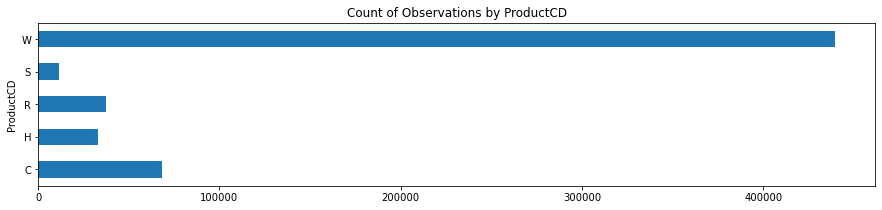

In [37]:
# ProductCD 시각화

train_df.groupby('ProductCD') \
    ['TransactionID'].count() \
    .sort_index() \
    .plot(kind='barh',
          figsize=(15, 3),
         title='Count of Observations by ProductCD')
plt.show()

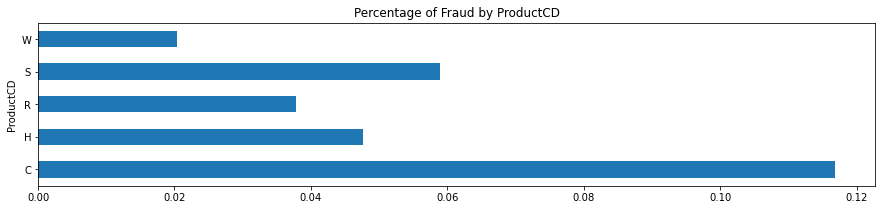

In [35]:
train_df.groupby('ProductCD')['isFraud'] \
    .mean() \
    .sort_index() \
    .plot(kind='barh',
          figsize=(15, 3),
         title='Percentage of Fraud by ProductCD')
plt.show()

In [ ]:
# 관측치 수가 W가 가장 많고 C가 가장 적음
# C가 가장 많은 사기 거래 발생

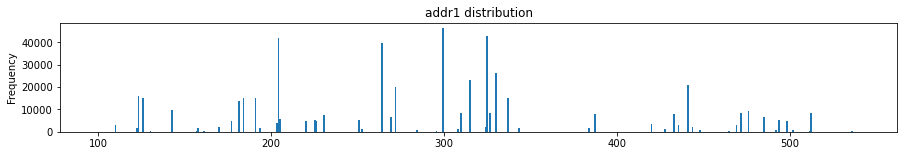

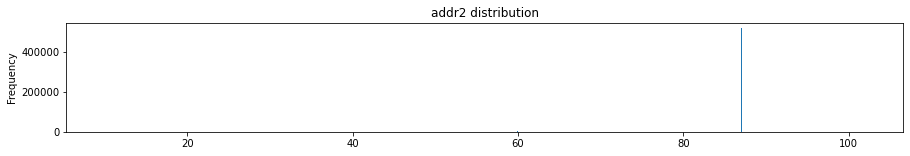

In [38]:
# add1 & add2
# 범주형 데이터
# add1 : 200~330 사이가 매우 높음

train_transaction['addr1'].plot(kind='hist', bins=500, figsize=(15, 2), title='addr1 distribution')
plt.show()
train_transaction['addr2'].plot(kind='hist', bins=500, figsize=(15, 2), title='addr2 distribution')
plt.show()

In [ ]:
# M4는 다른 M컬럼과 다르게 T, F값을 가지지 않음

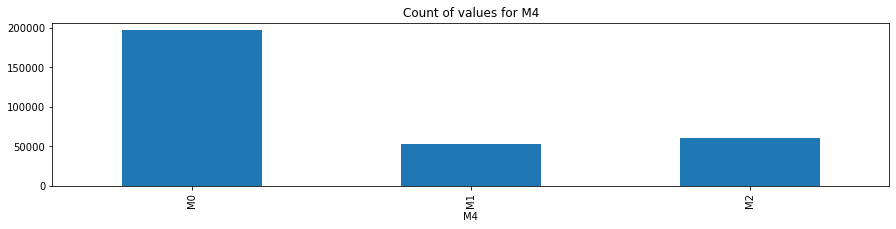

In [10]:
train_df.groupby('M4')['TransactionID'] \
    .count() \
    .plot(kind='bar',
          title='Count of values for M4',
          figsize=(15, 3))
plt.show()